In [24]:
%display latex

# 因式分解
$ \large{\frac{1}{x^2-1}} $

In [22]:
f = 1/((1+x)*(x-1))
latex(f.partial_fraction(x))

-\frac{1}{2 \, {\left(x\left(t\right) + 1\right)}} + \frac{1}{2 \, {\left(x\left(t\right) - 1\right)}}

# 解方程(解析解)
## 多项式方程
$ x^2+3x+2=0 $

In [25]:
x=var('x')
latex(solve(x^2+3*x+2,x))

\left[x = \left(-2\right), x = \left(-1\right)\right]

$ x^2+bx+c=0 $

In [26]:
x,b,c = var('x b c')
latex(solve(x^2+b*x+c,x))

\left[x = -\frac{1}{2} \, b - \frac{1}{2} \, \sqrt{b^{2} - 4 \, c}, x = -\frac{1}{2} \, b + \frac{1}{2} \, \sqrt{b^{2} - 4 \, c}\right]

## 线性方程组
$\begin{cases}x+y=6\\x-y=4\end{cases}$

In [27]:
x,y = var('x y')
eq = [x+y==6, 
      x-y==4]
latex(solve(eq,x,y))

\left[\left[x = 5, y = 1\right]\right]

## 非线性方程组
$ \begin{cases}
p+q=9 \\
qy+px=-6 \\
qy^2+px^2=24 
\end{cases}$

In [28]:
var('x y p q')

eq1 = p+q==9
eq2 = q*y+p*x==-6
eq3 = q*y^2+p*x^2==24

latex(solve([eq1,eq2,eq3,p==1],p,q,x,y))

\left[\left[p = 1, q = 8, x = -\frac{4}{3} \, \sqrt{10} - \frac{2}{3}, y = \frac{1}{6} \, \sqrt{10} - \frac{2}{3}\right], \left[p = 1, q = 8, x = \frac{4}{3} \, \sqrt{10} - \frac{2}{3}, y = -\frac{1}{6} \, \sqrt{10} - \frac{2}{3}\right]\right]

# 解方程(数值解)

In [29]:
var('x y p q')

eq1 = p+q==9
eq2 = q*y+p*x==-6
eq3 = q*y^2+p*x^2==24

solns = solve([eq1,eq2,eq3,p==1],p,q,x,y, solution_dict=True)
latex(solns)

\left[\left\{p : 1, q : 8, x : -\frac{4}{3} \, \sqrt{10} - \frac{2}{3}, y : \frac{1}{6} \, \sqrt{10} - \frac{2}{3}\right\}, \left\{p : 1, q : 8, x : \frac{4}{3} \, \sqrt{10} - \frac{2}{3}, y : -\frac{1}{6} \, \sqrt{10} - \frac{2}{3}\right\}\right]

In [9]:
[[s[p].n(30), s[q].n(30), s[x].n(30), s[y].n(30)] for s in solns]

[[1.0000000, 8.0000000, -4.8830369, -0.13962039],
 [1.0000000, 8.0000000, 3.5497035, -1.1937129]]

# 解方程(数值解)
$ \cos(\phi) = \sin(\phi), when (0<\phi<pi/2) $

In [11]:
phi = var('phi')
find_root(cos(phi)==sin(phi),0,pi/2)

0.7853981633974484

# 求导数
$\sin'(u)$

In [30]:
u = var('u')
latex(diff(sin(u), u))

\cos\left(u\right)

$[\sin(x^2)]^{(4)}$

In [31]:
latex(diff(sin(x^2), x, 4))

16 \, x^{4} \sin\left(x^{2}\right) - 48 \, x^{2} \cos\left(x^{2}\right) - 12 \, \sin\left(x^{2}\right)

# 偏导数
$\large{\frac{\partial (x^2+17y^2)}{\partial x}}$

In [32]:
x, y = var('x,y')

f = x^2 + 17*y^2
latex(f.diff(x))

2 \, x

# 常微分方程
(调用了Sage对[Maxima](http://maxima.sf.net/)的接口)

$ x'+x-1=0 $

In [33]:
t = var('t')    # define a variable t
x = function('x')(t)   # define x to be a function of that variable
DE = diff(x, t) + x - 1
latex(desolve(DE, [x,t]))

{\left(C + e^{t}\right)} e^{\left(-t\right)}

# 拉普拉斯变换
$L[t^2e^t - \sin(t)]$

In [34]:
s = var("s")
t = var("t")
f = t^2*exp(t) - sin(t)
latex(f.laplace(t,s))

-\frac{1}{s^{2} + 1} + \frac{2}{{\left(s - 1\right)}^{3}}

# 微分方程数值解法(欧拉法)
函数$z(t)$满足
$z''+tz'+z=0$, 
$z(0)=1$, 
$z'(0)=0$

用欧拉法求z(1)

In [35]:
#将二阶ODE化为两个一阶DE x=z, y=z'
t,x,y = PolynomialRing(RealField(10),3,"txy").gens()
f = y; g = -x - y * t
eulers_method_2x2(f,g, 0, 1, 0, 1/4, 1)

         t                    x                h*f(t,x,y)                    y           h*g(t,x,y)
         0                    1                      0.00                    0                -0.25
       1/4                  1.0                    -0.062                -0.25                -0.23
       1/2                 0.94                     -0.12                -0.48                -0.17
       3/4                 0.82                     -0.16                -0.66               -0.081
         1                 0.65                     -0.18                -0.74                0.022


# 绘制函数图像(通过微分方程+欧拉法)

In [36]:
f = lambda z: z[2]        # f(t,x,y) = y
g = lambda z: -sin(z[1])  # g(t,x,y) = -sin(x)
P = eulers_method_2x2_plot(f,g, 0.0, 0.75, 0.0, 0.1, 1.0)

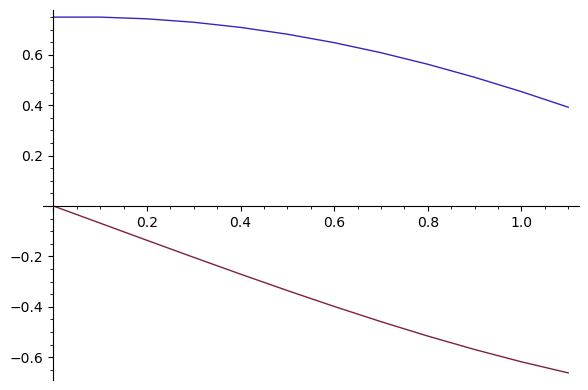

In [37]:
show(P[0] + P[1])